## Case Study 9 - Unsupervised learning - Wine dataset

### Objectives:
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters

### Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [4]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 13)

In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


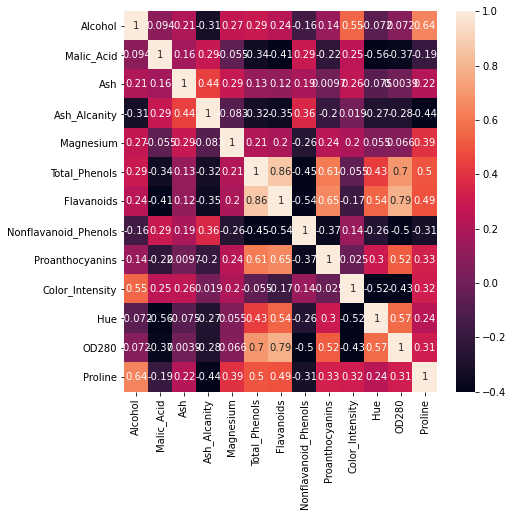

In [9]:
plt.figure(figsize=(7, 7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-0.4)
plt.show()

### Insights:
- The dataset contains 13 all numeric features
- There are no null values
- High correlation exist between some of the features

In [11]:
X = df.copy(deep=True)

### Scaling the data

In [12]:
scale = StandardScaler()
X = scale.fit_transform(X)

### 1. K-Means Clustering

#### Identifying ideal number of clusters

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


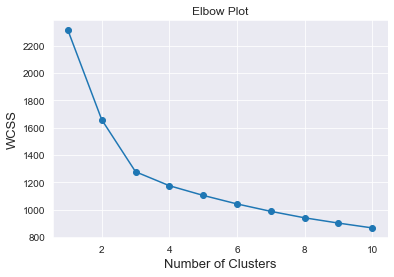

In [14]:
sns.set_style('darkgrid')
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.title('Elbow Plot')
plt.show()

From k = 3 onwards, decrese in wcss is not so sharp.

#### Using Silhouette score to validate

In [15]:
score=[]
for i in range(2,10):
    k = KMeans(i)
    k.fit(X)
    score.append(np.round(silhouette_score(X,k.labels_),2))

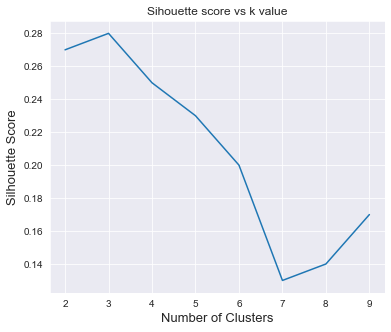

In [16]:
plt.figure(figsize=(6,5))
plt.plot(range(2,10),score)
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('Silhouette Score', fontsize=13)
plt.title('Sihouette score vs k value')
plt.show()

K = 3 has highest score.

#### Final K-Means Model

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [57]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

- Ideal number of clusters for K-Means is 3

### 2. Agglomerative Hierarchical Clustering

#### Using dendrogram to find ideal number of clusters

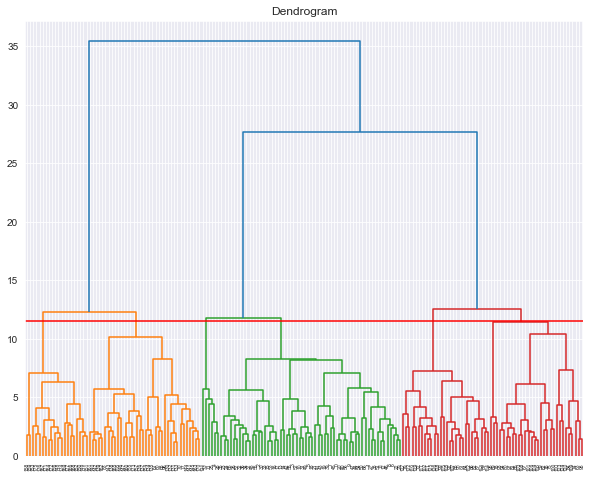

In [18]:
links = sch.linkage(X, method='ward')
plt.figure(figsize=(10, 8))
plt.title('Dendrogram')
sch.dendrogram(links)
plt.axhline(y = 11.5, color = 'r', linestyle = '-')
plt.show()

**We fix number of clusters as 6**

#### Final AHC Model

In [21]:
ahc = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_ahc = ahc.fit_predict(X)

In [22]:
y_ahc

array([1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 3, 1,
       1, 0, 2, 0, 2, 5, 3, 5, 0, 0, 0, 2, 0, 3, 0, 0, 3, 2, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 3, 2, 3, 0, 5, 3, 0, 0, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4], dtype=int64)

## 3.Find the optimum number of clusters in each model and create the model with the optimum number of clusters. 

The ideal number of clusters for Agglomerative Hierarchical clustering is 6

# K MEANS

In [27]:
#kmeans
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=5)
model_kmeans.fit(df)
labels_kmean=model_kmeans.predict(df)
labels_kmean

array([3, 3, 3, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 2, 2, 2,
       3, 3, 2, 2, 3, 0, 2, 3, 0, 0, 3, 0, 3, 2, 2, 3, 3, 2, 2, 3, 3, 4,
       2, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 1, 4, 1, 4, 1, 1, 4,
       1, 1, 2, 4, 2, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       4, 4, 1, 1, 1, 1, 1, 2, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 2, 1, 4, 2, 2, 1, 4, 4, 4, 1, 1, 1, 4,
       4, 4, 1, 2, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 2, 4, 1, 1, 4, 2, 2, 2,
       2, 4])

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

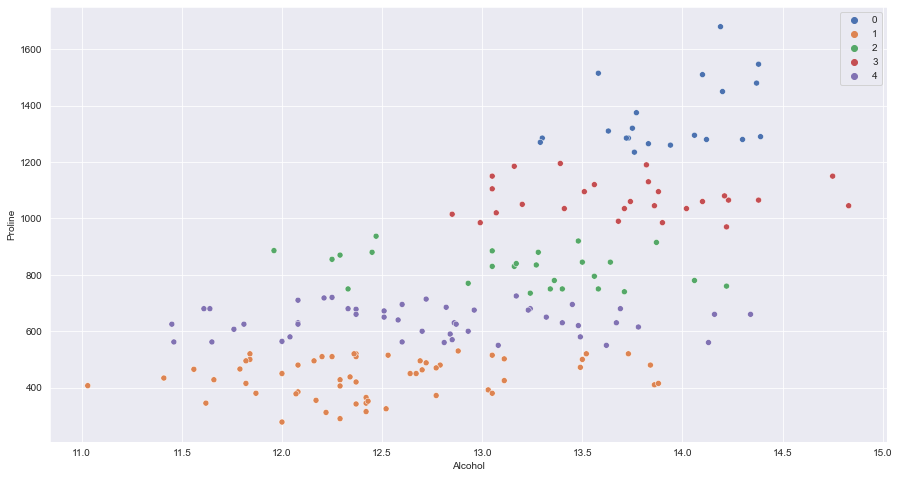

In [28]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_kmean,palette="deep")

# Hierarchial Clustering

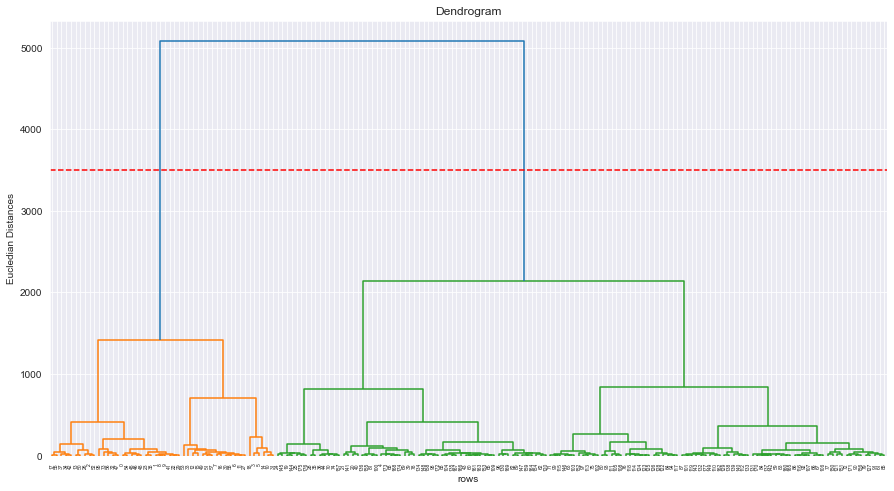

In [30]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('rows')
plt.hlines(3500,0,5000,colors='red',linestyles='dashed')
plt.ylabel('Eucledian Distances')
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_hc=cluster.fit_predict(df)
labels_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

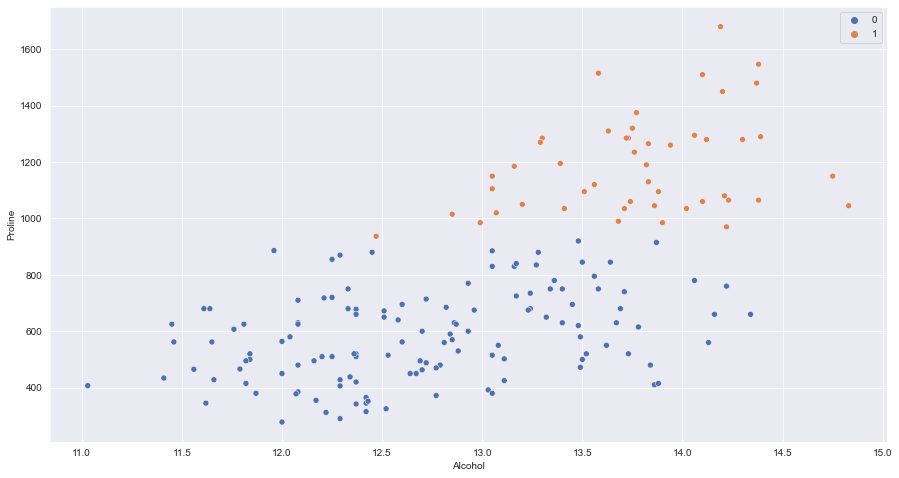

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue=labels_hc,palette="deep")

# Kmeans

In [34]:
#kmeans
from sklearn.cluster import KMeans
ks=range(1,10)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


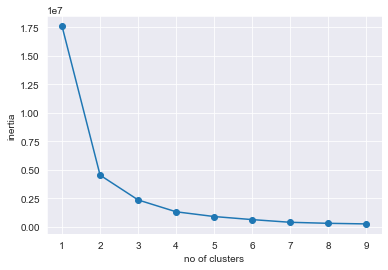

In [35]:
plt.plot(ks,inertia,'-o')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

In [36]:
#kmeans
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df)
labels_kmean=model_kmeans.predict(df)
labels_kmean

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

# Principal Component Analysis(PCA)

In [37]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
PCA_df=pd.DataFrame(pca.fit_transform(df),columns=['P1','P2'])
PCA_df

,P1,P2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


In [38]:
PCA_df['cluster_km']=labels_kmean
PCA_df['cluster_hc']=labels_hc
PCA_df

,P1,P2,cluster_km,cluster_hc
0,318.562979,21.492131,1,1
1,303.097420,-5.364718,1,1
2,438.061133,-6.537309,1,1
3,733.240139,0.192729,1,1
4,-11.571428,18.489995,2,0
...,...,...,...,...
173,-6.980211,-4.541137,2,0
174,3.131605,2.335191,2,0
175,88.458074,18.776285,2,0
176,93.456242,18.670819,2,0


In [39]:
red_centers_km=pca.transform(model_kmeans.cluster_centers_)
red_centers_km

array([[-288.75258647,   -2.23889973],
       [ 448.29677492,   -2.2569996 ],
       [ -18.48419282,    4.20263004]])

# Kmeans PCA plot P1 vs P2

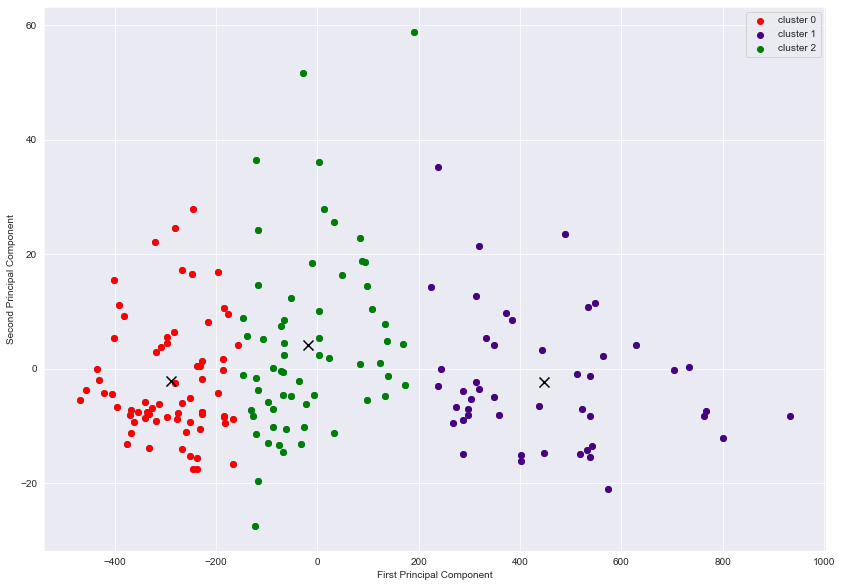

In [40]:
plt.figure(figsize=(14,10))
plt.scatter(PCA_df['P1'],PCA_df['P2'])
plt.scatter(PCA_df[PCA_df['cluster_km']==0].loc[:,'P1'],PCA_df[PCA_df['cluster_km']==0].loc[:,'P2'],color='red',label='cluster 0')
plt.scatter(PCA_df[PCA_df['cluster_km']==1].loc[:,'P1'],PCA_df[PCA_df['cluster_km']==1].loc[:,'P2'],color='indigo',label='cluster 1')
plt.scatter(PCA_df[PCA_df['cluster_km']==2].loc[:,'P1'],PCA_df[PCA_df['cluster_km']==2].loc[:,'P2'],color='green',label='cluster 2')

plt.scatter(red_centers_km[:,0],red_centers_km[:,1],color='black',marker='x',s=100)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

# Hierarchial Clustering plot P1 vs P2

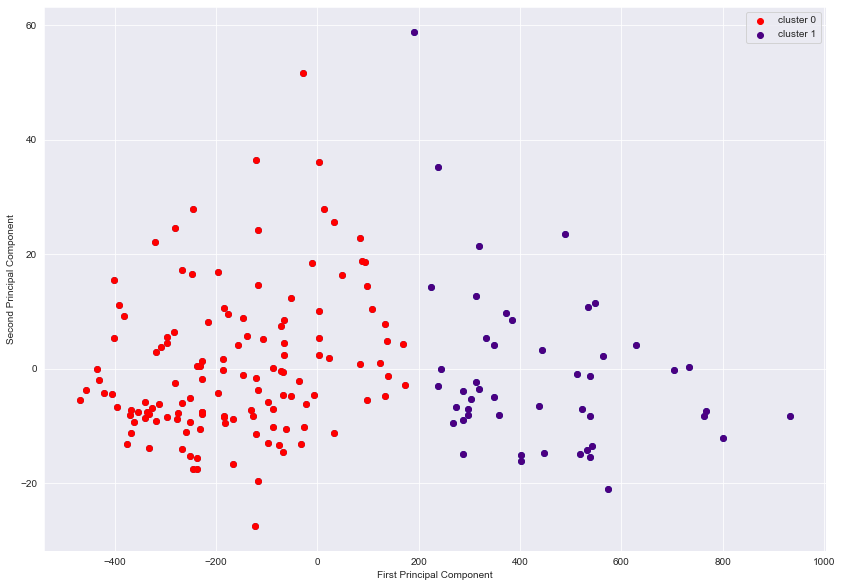

In [41]:
plt.figure(figsize=(14,10))
plt.scatter(PCA_df['P1'],PCA_df['P2'])
plt.scatter(PCA_df[PCA_df['cluster_hc']==0].loc[:,'P1'],PCA_df[PCA_df['cluster_hc']==0].loc[:,'P2'],color='red',label='cluster 0')
plt.scatter(PCA_df[PCA_df['cluster_hc']==1].loc[:,'P1'],PCA_df[PCA_df['cluster_hc']==1].loc[:,'P2'],color='indigo',label='cluster 1')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

# Insight
The PCA and plots it is clear that the models are clustered into three and two clusters in kmeans and Hierarchial Clustering respectively.

Hence there are 3 category of wines with Kmeans model and 2 category of wines with Hierarchial Clustering model.